# 05_SICfreq_maps

In [1]:
%load_ext autoreload
%autoreload 2

# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta
import calendar
from calendar import monthrange

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator

import matplotlib.dates as mdates

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy import img_transform

from metpy.units import units

# path to own functions
sys.path.append('../../')
import timeseries.adjust as tseries
import geofunc.general as geogen
import geofunc.vectors as vectors
import geofunc.shapes as geoshape
import plot_simply.general as plotter
import plot_simply.geomap as geomap
import data_NSIDC.icedrift as icedrift
import data_UniBremen.SIC as unisic

In [2]:
# Save to file
df = pd.read_csv('../data/constants.csv')
df = df.set_index('var')
df

cst = {}
for variable in list(df.index):
    cst[variable] = df.loc[variable]['value'] * units(df.loc[variable]['units'])
    
cst

{'Cp_o': <Quantity(3850.0, 'joule / kilogram / delta_degree_Celsius')>,
 'Cp_a': <Quantity(1004.0, 'joule / kilogram / delta_degree_Celsius')>,
 'sigma_sb': <Quantity(5.670367e-08, 'watt / meter ** 2 / kelvin ** 4')>,
 'rho_a': <Quantity(1.225, 'kilogram / meter ** 3')>,
 'rho_o': <Quantity(1028.0, 'kilogram / meter ** 3')>,
 'rho_i': <Quantity(917.0, 'kilogram / meter ** 3')>,
 'L_i': <Quantity(334000.0, 'joule / kilogram')>,
 'k_i': <Quantity(2.2, 'watt / meter / delta_degree_Celsius')>,
 'kappa': <Quantity(0.4, 'dimensionless')>,
 'St': <Quantity(0.0057, 'dimensionless')>,
 'omega': <Quantity(7.2921e-05, 'radian / second')>}

### Maps of SIC conditions

In [8]:
#==============================
yearss = np.arange(2003,2026)
month = 4
#==============================

all_month_dates = np.array([], dtype=np.datetime64)

for year in yearss:
    dates = pd.date_range(datetime(year,month,1), 
                          datetime(year,month,calendar.monthrange(year, month)[1]))
    all_month_dates = np.append(all_month_dates, dates)
all_month_dates = pd.to_datetime(all_month_dates)    
    
category_freq = {}

for open_thresh in np.arange(10,101,10):
    print(open_thresh)
    out = unisic.calc_meansic_openfreq(all_month_dates, crop=[500, 1300, 100, 500], 
                                        open_thresh=open_thresh, res='6250', hem='n', 
                                        main_path='/Volumes/Seagate_Jewell/KenzieStuff/', 
                                        coordinates=False, area=False, quiet=True)
    category_freq[open_thresh] = out['open_freq']
    
# save also avg. sic
category_freq['sic_mean'] = out['sic_mean']


data_vars = {}
data_vars[f'xx'] = (("y",'x'), out['xx'])
data_vars[f'yy'] = (("y",'x'), out['yy'])
for open_thresh in np.arange(10,101,10):
    data_vars[f'sic{open_thresh}'] = (("y",'x'), category_freq[open_thresh])
data_vars[f'sic_mean'] = (("y",'x'), out['sic_mean'])
coords={"x": out['xx'][0,:], "y": out['yy'][:,0]}

ds = xr.Dataset(data_vars, coords=coords, 
                attrs={'description':'monthly frequencies across winters 2002/3-2024/5 of ice below each SIC thresh.'})

# save to file
mainpath = '/Volumes/Seagate_Jewell/KenzieStuff/SBSpolynya_data/'
filename = f"open_freqs_2002-2025_M{month}.nc"
ds.to_netcdf(mainpath+filename)

10
20
30
40
50
60
70
80
90
100


In [9]:

data_vars = {}
data_vars[f'xx'] = (("y",'x'), out['xx'])
data_vars[f'yy'] = (("y",'x'), out['yy'])
for open_thresh in np.arange(10,101,10):
    data_vars[f'sic{open_thresh}'] = (("y",'x'), category_freq[open_thresh])
data_vars[f'sic_mean'] = (("y",'x'), out['sic_mean'])
coords={"x": out['xx'][0,:], "y": out['yy'][:,0]}

ds = xr.Dataset(data_vars, coords=coords, 
                attrs={'description':'monthly frequencies across winters 2002/3-2024/5 of ice below each SIC thresh.'})

# save to file
mainpath = '/Volumes/Seagate_Jewell/KenzieStuff/SBSpolynya_data/'
filename = f"open_freqs_2002-2025_M{month}.nc"
ds.to_netcdf(mainpath+filename)

In [54]:
ds = xr.open_dataset(mainpath+f"open_freqs_2002-2025_M{5}.nc")

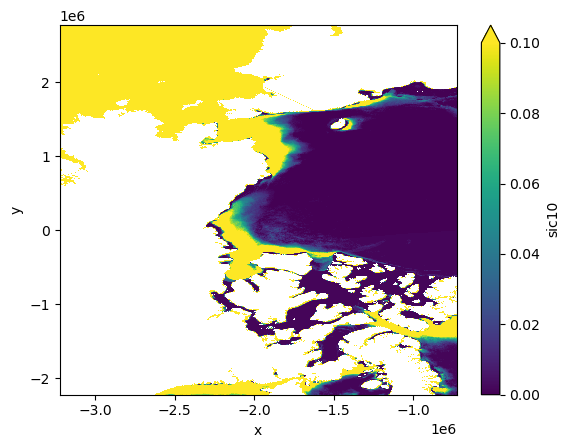

In [55]:
ds.sic10.plot(vmin=0, vmax=0.1)